# DS - MIP Fifa Player Data Analysis

### by Shreyas (1811049) & Sanyam (1811040)

<a id="section1"></a>
# 1.PACKAGES

In [4]:
install.packages('DataExplorer')
install.packages('maps')
install.packages('plotly')
install.packages('DT')
install.packages('tidytext')
install.packages('gridExtra')
install.packages('factoextra')
library(tidyverse) 
library(magrittr)
library(DataExplorer)
library(maps)
library(plotly)
library(DT)
library(tidytext)
library(gridExtra)
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘hunspell’, ‘janeaustenr’, ‘tokenizers’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘matri

In [5]:
options(scipen = 999)

<a id="section2"></a>
# 2.DATA

In [22]:
# Data Import
df <- read.csv("./data.csv", encoding = "UTF-8")[-1]
head(df)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club.Logo,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,⋯,96,33,28,26,6,11,15,14,8,€226.5M
2,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,⋯,95,28,31,23,7,11,15,14,11,€127.1M
3,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,⋯,94,27,24,33,9,9,15,15,11,€228.1M
4,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,⋯,68,15,21,13,90,85,87,88,94,€138.6M
5,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,⋯,88,68,58,51,15,13,5,10,13,€196.4M
6,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,⋯,91,34,27,22,11,12,6,8,8,€172.1M


<a id="subsection1"></a>
## 2.1.Data Structure 



In [7]:
dim(df)

[1] 17981    74

In [8]:
introduce(df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
17981,74,43,31,0,52754,15952,1330594,13604056


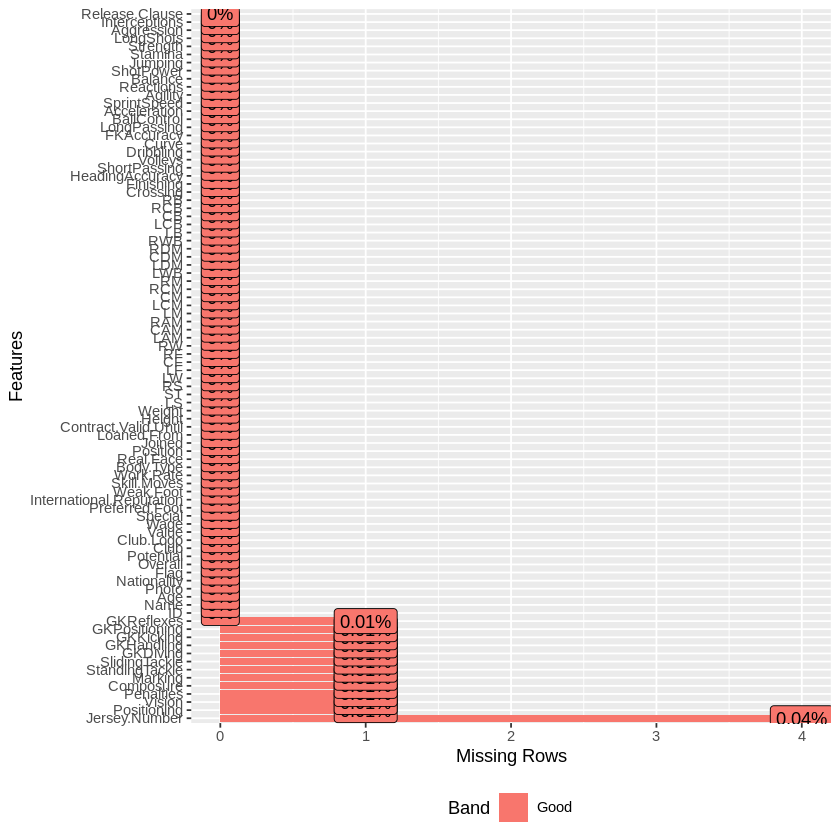

In [24]:
plot_missing(df)

<a id="section3"></a>
# 3.DATA MANIPULATION 

<a id="subsection2"></a>
## 3.1. Create League Variable & Sampling 

The data does not include league variable but we can extract leagues from Club variable.

In [25]:
bundesliga <- c(
  "1. FC Nürnberg", "1. FSV Mainz 05", "Bayer 04 Leverkusen", "FC Bayern München",
  "Borussia Dortmund", "Borussia Mönchengladbach", "Eintracht Frankfurt",
  "FC Augsburg", "FC Schalke 04", "Fortuna Düsseldorf", "Hannover 96",
  "Hertha BSC", "RB Leipzig", "SC Freiburg", "TSG 1899 Hoffenheim",
  "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"
)

premierLeague <- c(
  "Arsenal", "Bournemouth", "Brighton & Hove Albion", "Burnley",
  "Cardiff City", "Chelsea", "Crystal Palace", "Everton", "Fulham",
  "Huddersfield Town", "Leicester City", "Liverpool", "Manchester City",
  "Manchester United", "Newcastle United", "Southampton", 
  "Tottenham Hotspur", "Watford", "West Ham United", "Wolverhampton Wanderers"
  
)

laliga <- c(
  "Athletic Club de Bilbao", "Atlético Madrid", "CD Leganés",
  "Deportivo Alavés", "FC Barcelona", "Getafe CF", "Girona FC", 
  "Levante UD", "Rayo Vallecano", "RC Celta", "RCD Espanyol", 
  "Real Betis", "Real Madrid", "Real Sociedad", "Real Valladolid CF",
  "SD Eibar", "SD Huesca", "Sevilla FC", "Valencia CF", "Villarreal CF"
)

seriea <- c(
  "Atalanta","Bologna","Cagliari","Chievo Verona","Empoli", "Fiorentina","Frosinone","Genoa",
  "Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma","Sampdoria","Sassuolo","SPAL",
  "Torino","Udinese"
  
)

superlig <- c(
  "Akhisar Belediyespor","Alanyaspor", "Antalyaspor","Medipol Başakşehir FK","BB Erzurumspor","Beşiktaş JK",
  "Bursaspor","Çaykur Rizespor","Fenerbahçe SK", "Galatasaray SK","Göztepe SK","Kasimpaşa SK",
  "Kayserispor","Atiker Konyaspor","MKE Ankaragücü", "Sivasspor","Trabzonspor","Yeni Malatyaspor"
)

ligue1 <- c(
  "Amiens SC", "Angers SCO", "AS Monaco", "AS Saint-Étienne", "Dijon FCO", "En Avant de Guingamp",
  "FC Nantes", "FC Girondins de Bordeaux", "LOSC Lille", "Montpellier HSC", "Nîmes Olympique", 
  "OGC Nice", "Olympique Lyonnais","Olympique de Marseille", "Paris Saint-Germain", 
  "RC Strasbourg Alsace", "Stade Malherbe Caen", "Stade de Reims", "Stade Rennais FC", "Toulouse Football Club"
)

eredivisie <- c(
  "ADO Den Haag","Ajax", "AZ Alkmaar", "De Graafschap","Excelsior","FC Emmen","FC Groningen",
  "FC Utrecht", "Feyenoord","Fortuna Sittard", "Heracles Almelo","NAC Breda",
  "PEC Zwolle", "PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"
)

liganos <- c(
  "Os Belenenses", "Boavista FC", "CD Feirense", "CD Tondela", "CD Aves", "FC Porto",
  "CD Nacional", "GD Chaves", "Clube Sport Marítimo", "Moreirense FC", "Portimonense SC", "Rio Ave FC",
  "Santa Clara", "SC Braga", "SL Benfica", "Sporting CP", "Vitória Guimarães", "Vitória de Setúbal"
)


df %<>% mutate(
    League = case_when(
        Club %in% bundesliga ~ "Bundesliga",
        Club %in% premierLeague ~ "Premier League",
        Club %in% laliga ~ "La Liga",
        Club %in% seriea ~ "Serie A",
        Club %in% superlig ~ "Süper Lig",
        Club %in% ligue1 ~ "Ligue 1",
        Club %in% liganos ~ "Liga Nos",
        Club %in% eredivisie ~ "Eredivisie"
    ),
    Country = case_when(
        League == "Bundesliga" ~ "Germany",
        League == "Premier League" ~ "UK",
        League == "La Liga" ~ "Spain",
        League == "Serie A" ~ "Italy",
        League == "Süper Lig" ~ "Turkey",
        League == "Ligue 1" ~ "France",
        League == "Liga Nos" ~ "Portugal", 
        League == "Eredivisie" ~ "Netherlands"
    )
) %>% filter(!is.na(League)) %>% mutate_if(is.factor, as.character)


rm(bundesliga, premierLeague, laliga, seriea, superlig, ligue1, eredivisie, liganos)

<a id="subsection3"></a>
## 3.2. String Manipulation

Value and Wage variables has described as discrete variables. We should transform these  as continuous variable.

In [26]:
head(df$Value)

[1] "€110.5M" "€77M"    "€118.5M" "€72M"    "€102M"   "€93M"

In [27]:
# Player Value
df$Values <- str_remove_all(df$Value,"€")
df$Values <- str_replace_all(df$Values,"K", "000")
df$Values <- str_remove_all(df$Values,"M")

df$Values <- as.numeric(df$Values)

# Player Wage
df$Wages <- str_remove_all(df$Wage,"€")
df$Wages <- str_replace_all(df$Wages,"K", "000")

df$Wages <- as.numeric(df$Wages)

df <- df  %>% mutate(Values = if_else(df$Values < 1000 , Values * 1000000, Values))

<a id="subsection4"></a>
## 3.3. Create Position Class 

Every players has a position on the football pitch. We can create Position Class variable by using Position information.

In [28]:
unique(df$Position)

[1] "RF"  "ST"  "LW"  "GK"  "RCM" "LF"  "RS"  "RCB" "LCM" "CB"  "LDM" "CAM"
[13] "CDM" "LS"  "LCB" "RM"  "LAM" "LM"  "LB"  "RDM" "RW"  "CM"  "RB"  "RAM"
[25] "CF"  "RWB" "LWB"

In [29]:
defence <- c("CB", "RB", "LB", "LWB", "RWB", "LCB", "RCB")
midfielder <- c("CM", "CDM","CAM","LM","RM", "LAM", "RAM", "LCM", "RCM", "LDM", "RDM")

df %<>% mutate(Class = ifelse(Position %in% "GK", "Goal Keeper",
                                 ifelse(Position %in% defence, "Defender",
                                         ifelse(Position %in% midfielder, "Midfielder", "Forward"))))

rm(defence, midfielder)

<a id="subsection5"></a>
## 3.4. Height & Weight 

Height and Weight variables convert cm and kg units.


In [30]:
df %<>%
  mutate(Height = round((as.numeric(str_sub(Height, start=1,end = 1))*30.48) + (as.numeric(str_sub(Height, start = 3, end = 5))* 2.54)),
         Weight = round(as.numeric(str_sub(Weight, start = 1, end = 3)) / 2.204623))

<a id="subsection6"></a>
## 3.5. Correction of the Preferred Foot Variable 

In [31]:
df %<>% filter(Preferred.Foot %in% c("Left", "Right")) 
df$Preferred.Foot <- as.factor(as.character(df$Preferred.Foot))

<a id="subsection7"></a>
## 3.6. Rename Some Variables 

In [32]:
df %<>% 
  rename(
    "Heading.Accuracy"= HeadingAccuracy,
    "Short.Passing"= ShortPassing,
    "FK.Accuracy" = FKAccuracy,
    "Long.Passing"= LongPassing,
    "Ball.Control"= BallControl,
    "Sprint.Speed"= SprintSpeed,
    "Shot.Power"= ShotPower,
    "Long.Shots"= LongShots,
    "Standing.Tackle"= StandingTackle,
    "Sliding.Tackle"= SlidingTackle,
    "GK.Diving"= GKDiving,
    "GK.Handling"= GKHandling,
    "GK.Kicking"= GKKicking,
    "GK.Positioning"= GKPositioning,
    "GK.Reflexes"= GKReflexes
  )

<a id="subsection8"></a>
## 3.7. Remove Unnecessary Variables 

In [33]:
df %<>% select(-ID, -Body.Type, -Real.Face, -Joined, -Loaned.From, -Release.Clause, -Photo, -Flag, -Special, -Work.Rate)

<a id="section4"></a>
# 4. TIDY DATA 

After the data manipulation, we reach the tidy data.

In [34]:
introduce(df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
3533,83,38,45,0,0,3533,293239,2174480


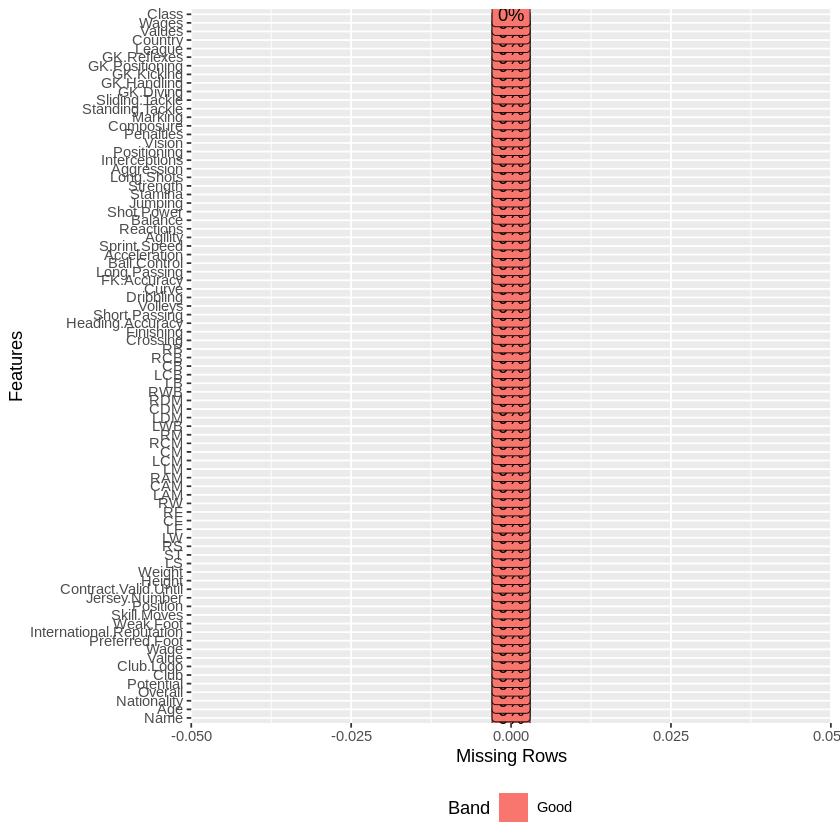

In [35]:
plot_missing(df)

<a id="section5"></a>
# 5. DATA ANALYSIS & VISUALIZATION 

<a id="subsection9"></a>
## 5.1. Finding Distribution and the Average of The Players in each League

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



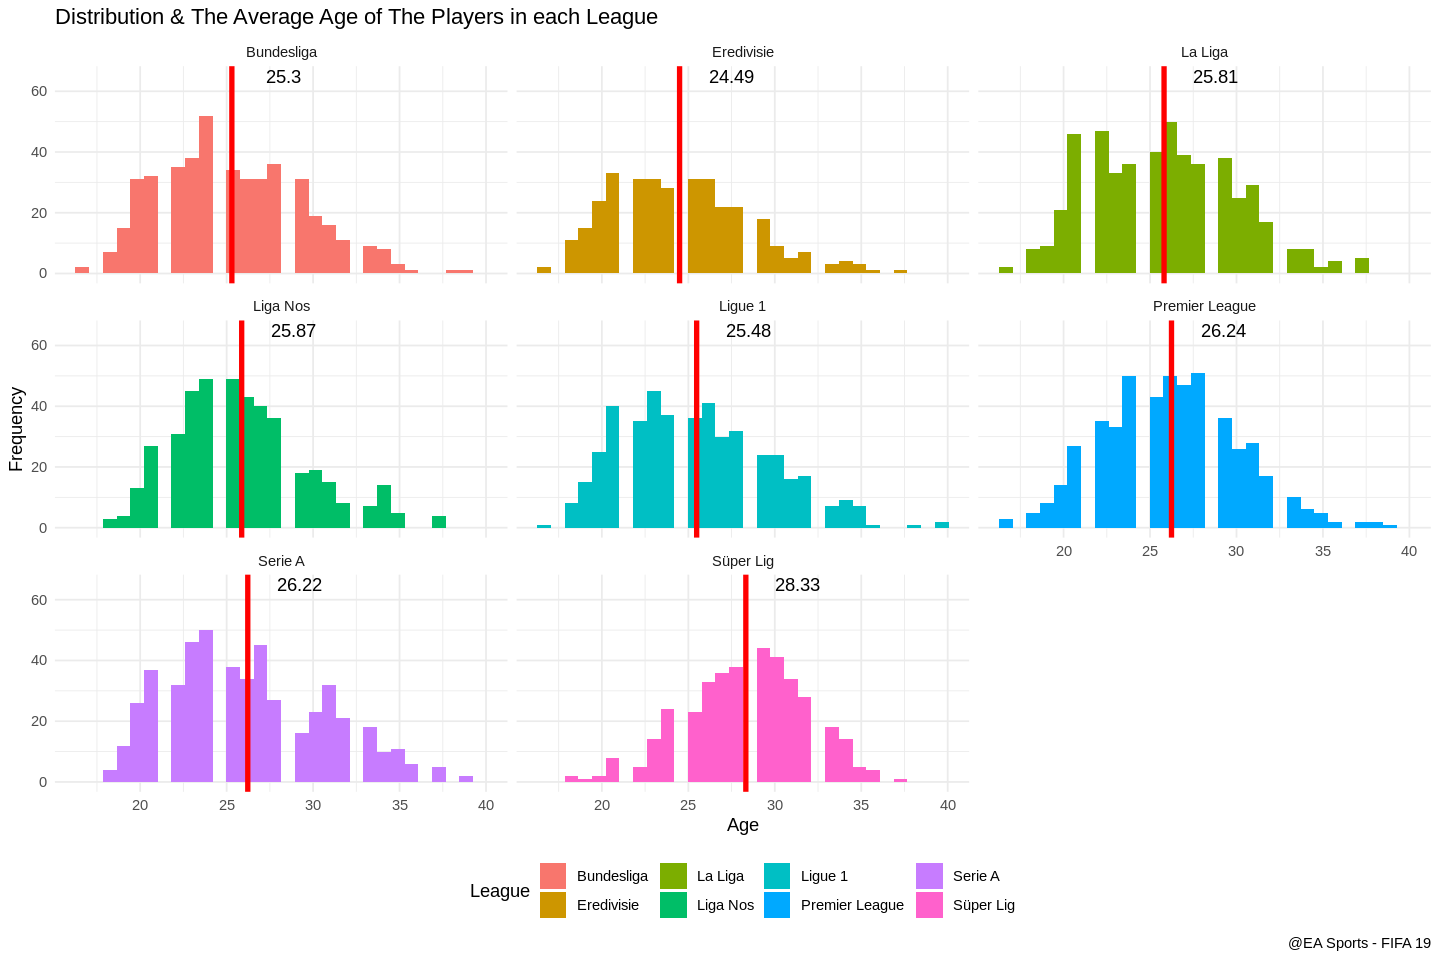

In [36]:
summ <- df %>% 
  group_by(League) %>% 
  summarise(age = mean(Age))

options(repr.plot.width = 12, repr.plot.height = 8)

ggplot()+
  geom_histogram(df, mapping = aes(Age, fill = League))+
  geom_vline(summ, mapping = aes(xintercept = age), color = "red", size = 1.5)+
  geom_text(summ, mapping = aes(x = age+3, y = 65, label = round(age,digits = 2)))+
  facet_wrap(League~.)+
  theme_minimal()+
  theme(legend.position = "bottom")+
  labs(y = "Frequency", title = "Distribution & The Average Age of The Players in each League", caption = "@EA Sports - FIFA 19")
  

<a id="subsection10"></a>
## 5.2. Total Market Value in each League 

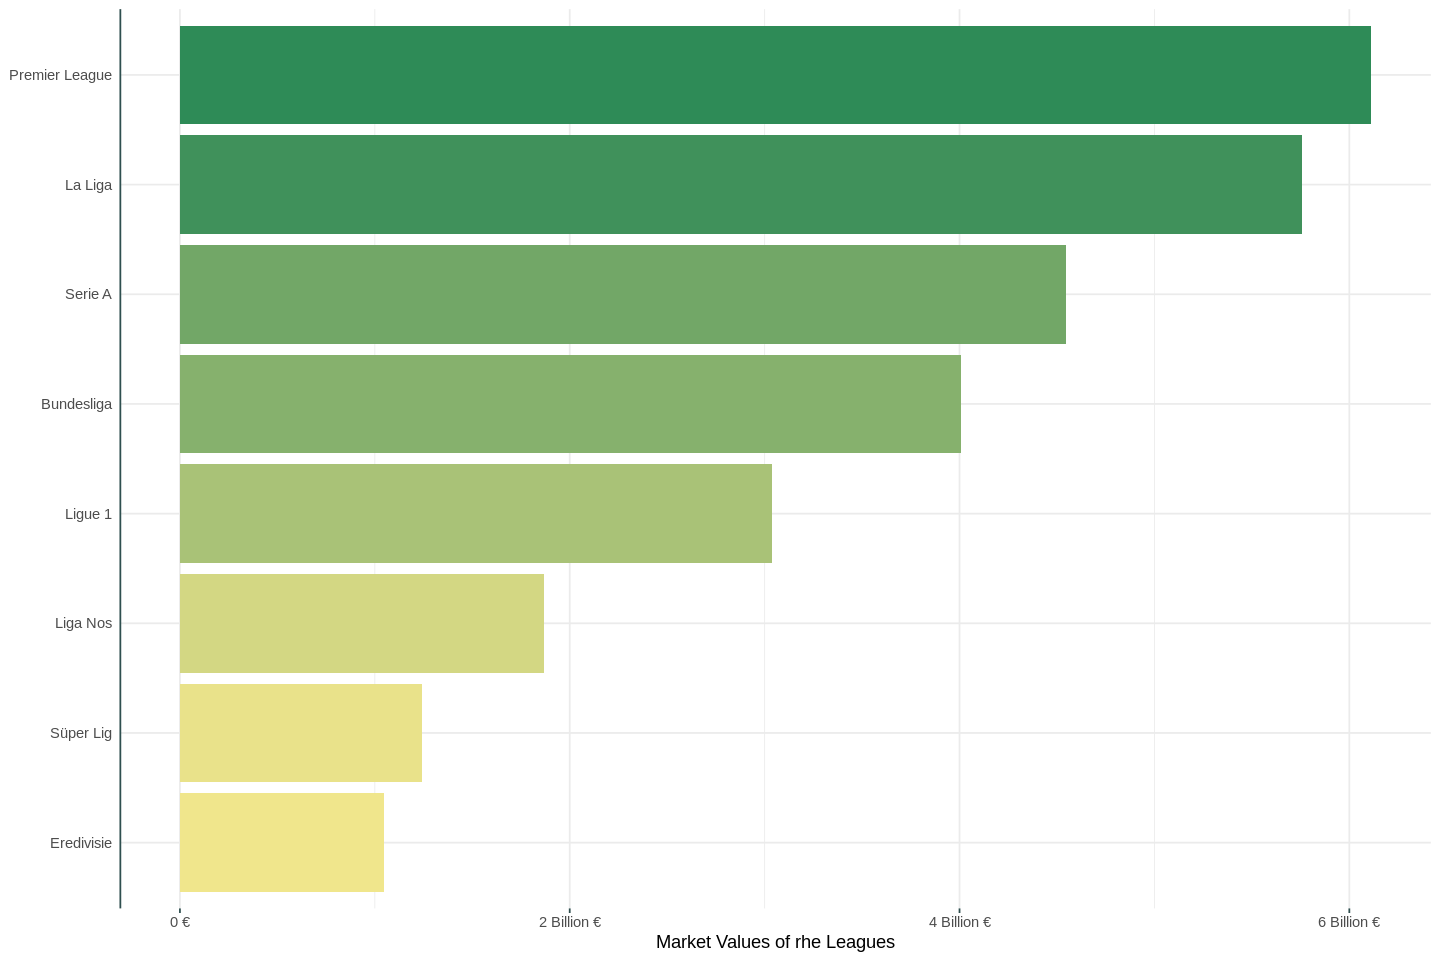

In [37]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  group_by(League) %>% 
  summarise(Total.Value = sum(as.integer(Values), na.rm = TRUE)) %>% 
  ggplot(aes(reorder(League, Total.Value), Total.Value, fill = Total.Value))+
  geom_col(show.legend = FALSE)+
  coord_flip()+
  theme_minimal()+
  labs(x = NULL, y = "Market Values of rhe Leagues")+
  scale_fill_gradient(low = "khaki", high = "seagreen")+
  theme(axis.line.y = element_line(colour = "darkslategray"),
        axis.ticks.x = element_line(colour = "darkslategray"))+
  scale_y_continuous(labels = c("0 €", "2 Billion €", "4 Billion €", "6 Billion €")) 

<a id="subsection12"></a>
## 5.3. Comparison of the Two Players 

In [38]:
# Selection of the players
players <- df %>% 
  filter(Name %in% c("Cristiano Ronaldo", "L. Messi")) %>% 
# Unite Name & Club variables
  mutate(Name = paste0(Name, ", ", Club)) %>%
# Selection abilities of the players
  select(Name,Crossing:Sliding.Tackle) %>% 
# Correction of the punctuation
  rename_all(funs(gsub("[[:punct:]]", " ", .))) %>% 
# Tranform from Variable to Observation
  gather(Skill, Exp, Crossing:`Sliding Tackle`, -Name)
head(players  )

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


,Name,Skill,Exp
,<chr>,<chr>,<int>
1,"L. Messi, FC Barcelona",Crossing,84
2,"Cristiano Ronaldo, Juventus",Crossing,84
3,"L. Messi, FC Barcelona",Finishing,95
4,"Cristiano Ronaldo, Juventus",Finishing,94
5,"L. Messi, FC Barcelona",Heading Accuracy,70
6,"Cristiano Ronaldo, Juventus",Heading Accuracy,89


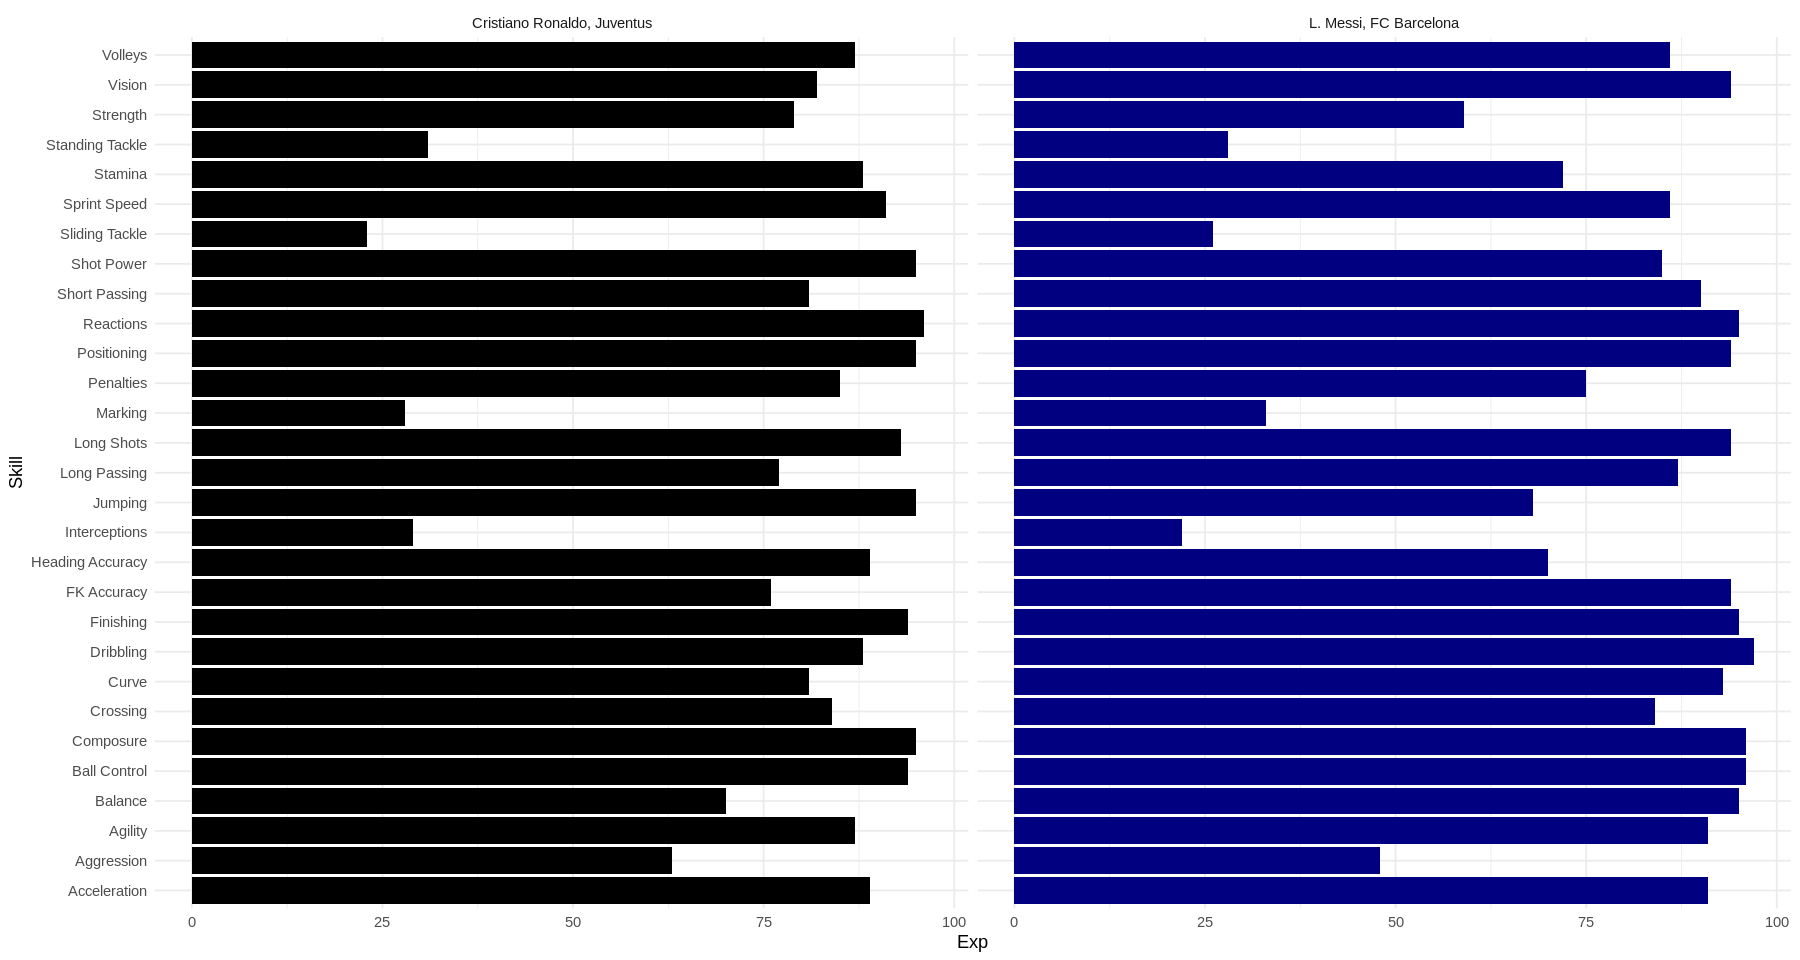

In [41]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(players, aes(Skill, Exp, fill = Name))+
  geom_col(show.legend = FALSE)+
  coord_flip()+
  facet_wrap(Name~.)+
  scale_fill_manual(values = c("black", "navy"))+
  theme_minimal()

<a id="subsection13"></a>
## 5.4. Visualization of the Position

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


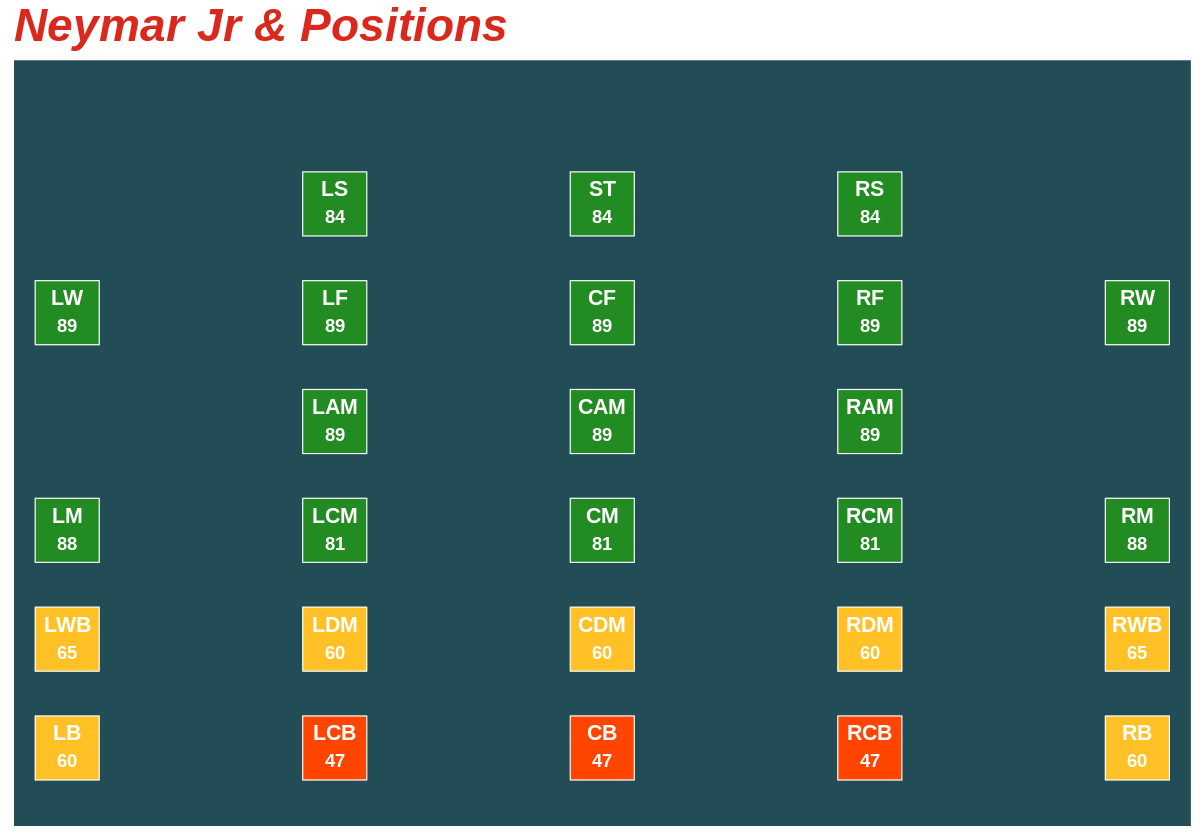

In [42]:
options(repr.plot.width = 10, repr.plot.height = 7)

# Select a player
player <- df %>% filter(Name == "Neymar Jr")%>%  select(Position, LS:RB)
# Transform from column to observation
player <- as.data.frame(t(player)) %>% 
  rownames_to_column("Pos") %>% 
  mutate(V1 = as.numeric(str_sub(V1, end = 2)),
         Pos = as.factor(Pos))

# Create pitch & positions
pos <- data.frame(
  Pos = as.character(c("LB","LCB","CB", "RCB","RB",
                      "LWB", "LDM", "CDM", "RDM", "RWB",
                      "LM", "LCM", "CM", "RCM", "RM",
                      "LAM", "CAM", "RAM",
                      "LW","LF","CF","RF","RW",
                      "LS","ST","RS")), 
  x = c(1:5, 1:5,1:5, 2:4, 1:5,2:4),
  y = c(rep(1,5), rep(1.5,5), rep(2,5), rep(2.5,3), rep(3,5), rep(3.5,3)))

# Join player data & pitch
player <- left_join(player, pos, by = 'Pos')

# Remove an unnecessary observation
player <- na.omit(player)

# Visual
ggplot(player, aes(x, y, fill = if_else(V1 < 50, "orangered", 
                                        if_else(V1 <60, "orange",
                                                if_else(V1 < 70, "goldenrod1", 
                                                        if_else(V1 <80, "palegreen4",
                                                                if_else(V1 < 90, "forestgreen",
                                                                        if_else(V1 == 0,
                                                                                "orangered","darkgreen"))))))
                   ))+
  geom_point(shape = 22, size = 20, color = "white", show.legend = FALSE,position = "identity")+
  theme(panel.background = element_rect(fill = "#224C56"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_blank(),
        title = element_text(color = "#DA291C",face="bold.italic",size = 23) 
        )+
  geom_text(aes(label = Pos), vjust= -0.5, color = "white", size = 4.5, fontface = "bold")+
  geom_text(aes(label = V1), vjust = 1.5, fontface = "bold", color = "white")+
  scale_fill_identity()+
  ylim(0.8, 4)+
  labs(title = "Neymar Jr & Positions")

<a id="subsection14"></a>
## 5.5. BMI - Body Mass Index 

- Below the Ideal Weight:	   < 18,49
- Ideal Weight:	               18.5 - 24,99
- Over the Ideal Weight:	   25 - 29,99
- Much Over The Ideal Weight:  > 30


In [43]:
# Calculate BMI
bmi <- df %>% 
  filter(Club == "Liverpool") %>%
  mutate(BMI = round(Weight/(Height/100)^2, digits = 4))%>%
  arrange(-BMI)%>%
  select(Name, Age, Position, Class, Height, Weight, BMI)

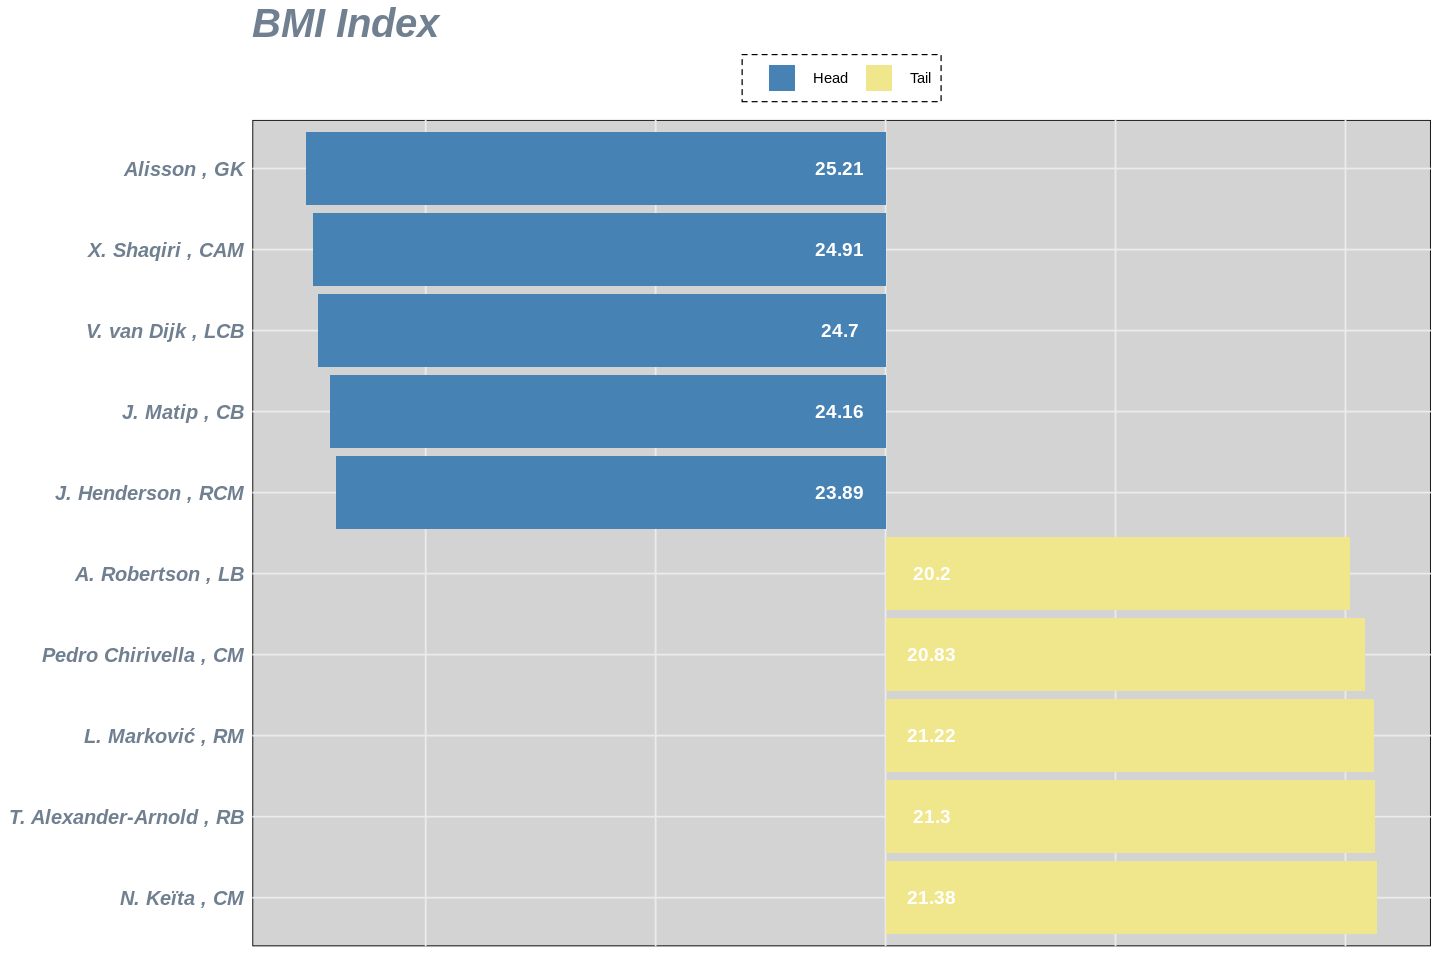

In [44]:
options(repr.plot.width = 12, repr.plot.height = 8)

# Head & Tail Observations
bmi2  <- rbind(
  bmi %>% head(5) %>% mutate(BMI = BMI * -1),
  bmi %>% tail(5)
  ) %>% mutate(Type = if_else(BMI < 0, "Head", "Tail"))

# BMI Visual
bmi2 %>% 
  ggplot(aes(fct_reorder(paste(Name,",", Position), desc(BMI)), BMI))+
  geom_col(aes(fill = Type))+
  geom_text(aes(y = c(rep(-2,5), rep(2,5)),label = round(abs(BMI),digits = 2)), 
            color = "white", fontface = "bold", size = 4)+
  coord_flip()+
  theme_minimal()+
  theme(axis.text.x = element_blank(),
        legend.position = "top",
        panel.background = element_rect(fill = "lightgray"),
        panel.grid.minor = element_blank(),
        axis.text = element_text(color = "slategray", face = "bold.italic",size = 12),
        title = element_text(color = "slategray", face = "bold.italic",size = 20),
        legend.box.background = element_rect(linetype = 2))+
  labs(x = NULL, y = NULL, fill = NULL, title = "BMI Index")+
  scale_fill_manual(values = c("steelblue", "khaki"))

<a id="subsection15"></a>
## 5.6. Correlation 

Is there a relationship between Finishing and Shot Power?

First of all, we should choose correlation coefficient wisely. Therefore, we have to control normallity. Shapiro test is an univariate normallity test. If p-value is less than 0.05, we reject H0 hypothesis and distribution of the variable is not normal.

In [45]:
kor <- df %>% 
  filter(League == "La Liga", Class == "Forward") %>% 
  select(Name, Preferred.Foot, Finishing, Shot.Power)

shapiro.test(kor$Finishing); shapiro.test(kor$Shot.Power)


	Shapiro-Wilk normality test

data:  kor$Finishing
W = 0.96722, p-value = 0.0226



	Shapiro-Wilk normality test

data:  kor$Shot.Power
W = 0.92561, p-value = 0.00006941


Finishing and Shot Power are not normal. Spearman correlation coefficient is much suitable to using.

In [46]:
cor.test(kor$Shot.Power, kor$Finishing, method = "pearson")
cor.test(kor$Shot.Power, kor$Finishing, method = "kendall")
hypo <- cor.test(kor$Shot.Power, kor$Finishing, method = "spearman")
hypo


	Pearson's product-moment correlation

data:  kor$Shot.Power and kor$Finishing
t = 7.2957, df = 88, p-value = 0.000000000124
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4660799 0.7284002
sample estimates:
      cor 
0.6139153 



	Kendall's rank correlation tau

data:  kor$Shot.Power and kor$Finishing
z = 5.896, p-value = 0.000000003724
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4397182 


Warning message in cor.test.default(kor$Shot.Power, kor$Finishing, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  kor$Shot.Power and kor$Finishing
S = 49477, p-value = 0.0000000007518
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5927319 


`geom_smooth()` using formula 'y ~ x'



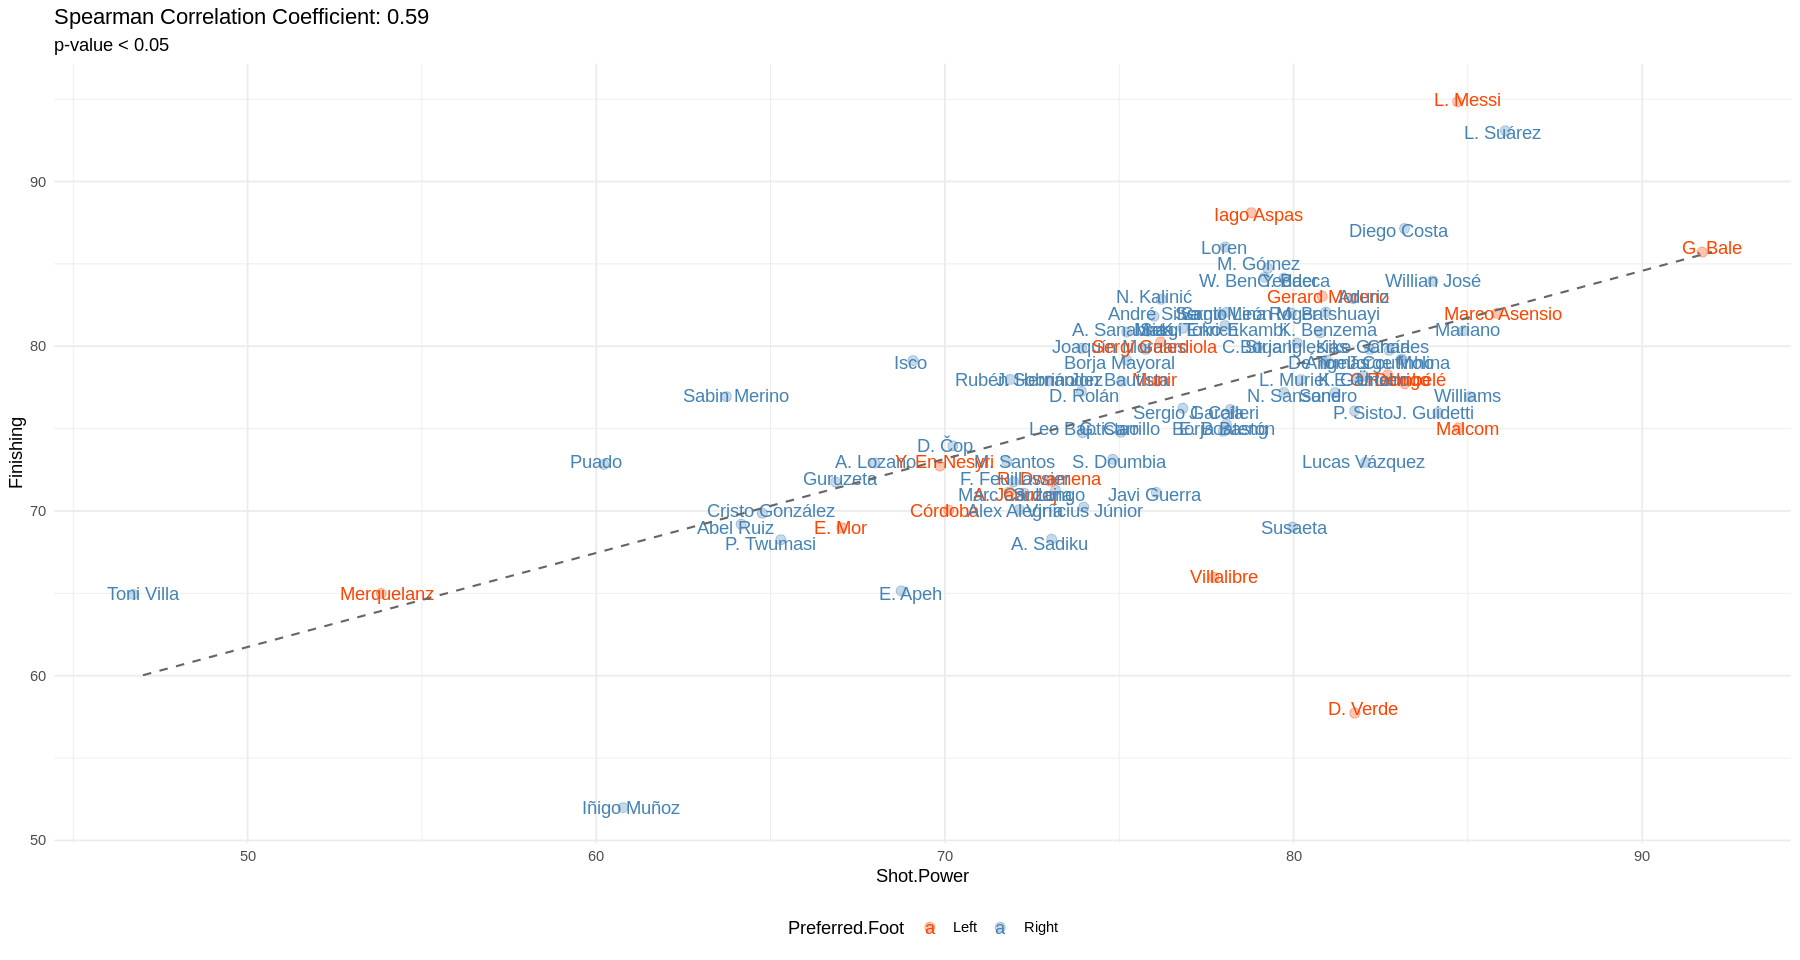

In [47]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(kor, aes(Shot.Power, Finishing, label = Name, color = Preferred.Foot))+
  geom_text()+
  theme_minimal()+
  theme(legend.position = "bottom")+
  geom_jitter(alpha = 0.3, size = 2.5, width = 0.3, height = 0.3)+
  geom_smooth(method = "lm", color = "gray40", lty = 2, se = FALSE, size = 0.6)+
  scale_color_manual(values = c("orangered","steelblue"))+
  labs(title = paste("Spearman Correlation Coefficient:", round(hypo$estimate, digits = 2)),
       subtitle = "p-value < 0.05")

<a id="subsection17"></a>
## 5.7. Potential & Overall 

### 5.7.1. The Best Players from Paris Saint-Germain <a name="5.9.1."></a>

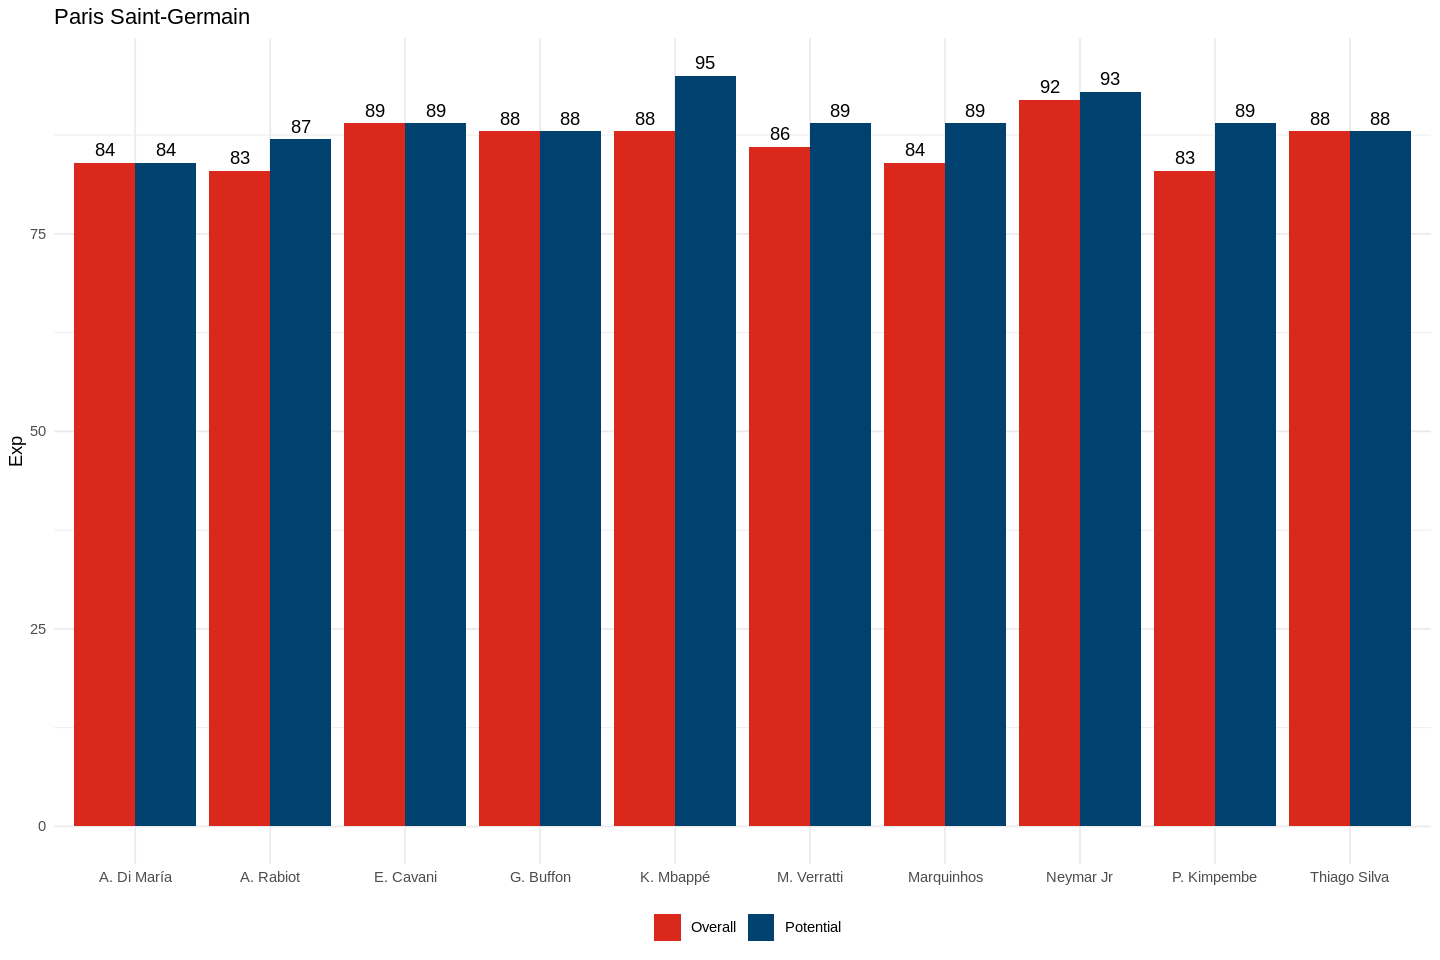

In [48]:
options(repr.plot.width = 12, repr.plot.height = 8)

df %>% 
  filter(Club == "Paris Saint-Germain") %>% 
  select(Name, Overall, Potential) %>% 
  arrange(-Overall) %>% 
  head(10) %>% 
  gather(variable, Exp, -Name) %>% 
  ggplot(aes(Name, Exp, fill = variable))+
  geom_col(position = "dodge")+
  geom_text(aes(label = Exp),position = position_dodge(width = 0.9), vjust = -0.5)+
  scale_fill_manual(values = c("#DA291C", "#004170"))+
  theme_minimal()+
  theme(legend.position = "bottom")+
  labs(fill = NULL, x = NULL, title = "Paris Saint-Germain")

<a id="subsection19"></a>
## 5.8. When will contracts expire in each league? 

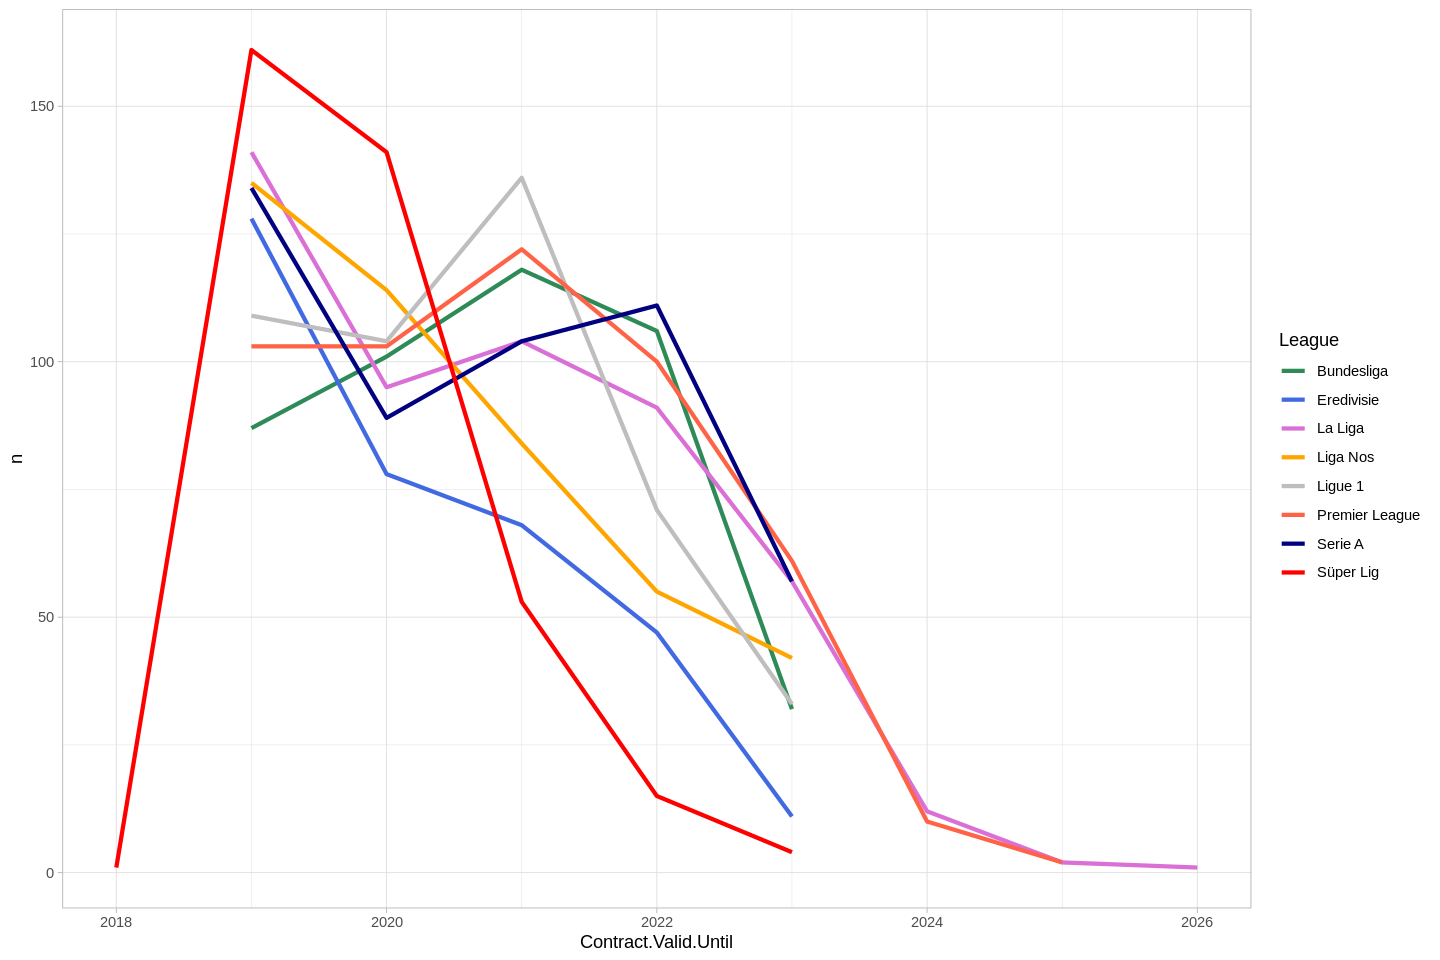

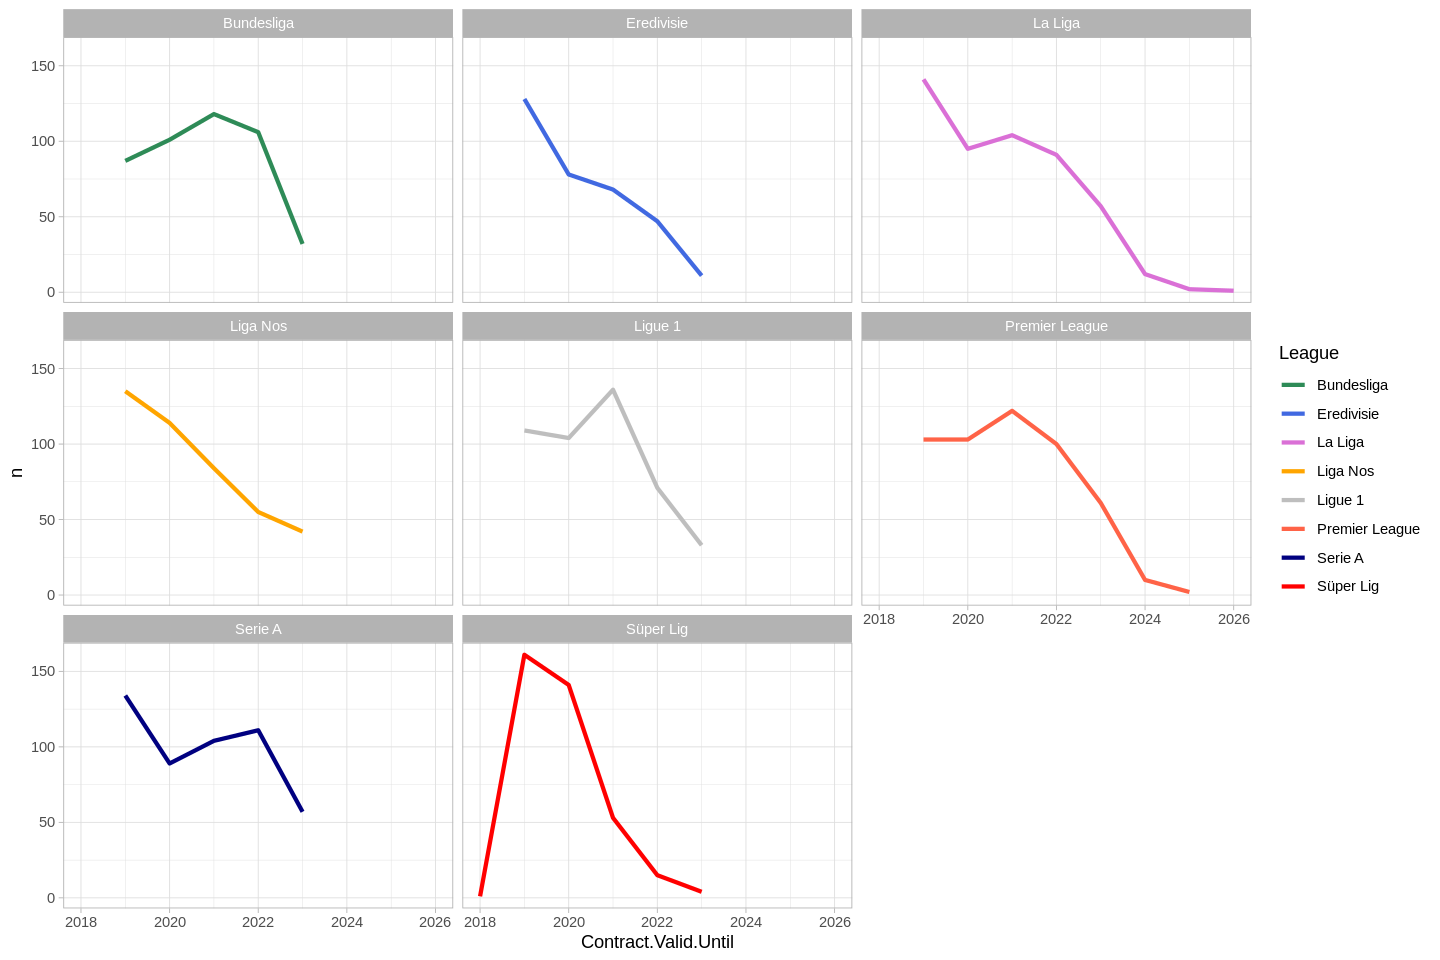

In [50]:
options(repr.plot.width = 12, repr.plot.height = 8)

df <- df %>% 
  mutate(Contract.Valid.Until = as.numeric(
    str_sub(
      Contract.Valid.Until, str_length(Contract.Valid.Until)-3, str_length(Contract.Valid.Until))
    )
  ) 

df %>% 
  group_by(Contract.Valid.Until, League) %>% 
  count() %>%
  ungroup() %>% 
  ggplot(aes(Contract.Valid.Until, n, color = League))+
  geom_line(size = 1.2)+
  theme_light()+
  scale_color_manual(values = c("seagreen", "royalblue", "orchid", "orange", "gray", "tomato", "navy", "red"))

df %>% 
  group_by(Contract.Valid.Until, League) %>% 
  count() %>%
  ungroup() %>% 
  ggplot(aes(Contract.Valid.Until, n, color = League))+
  geom_line(size = 1.2)+
  theme_light()+
  scale_color_manual(values = c("seagreen", "royalblue", "orchid", "orange", "gray", "tomato", "navy", "red"))+
  facet_wrap(League~.)

<a id="subsection20"></a>
## 5.9. The Most Powerful Clubs 

`summarise()` has grouped output by 'Club'. You can override using the `.groups` argument.



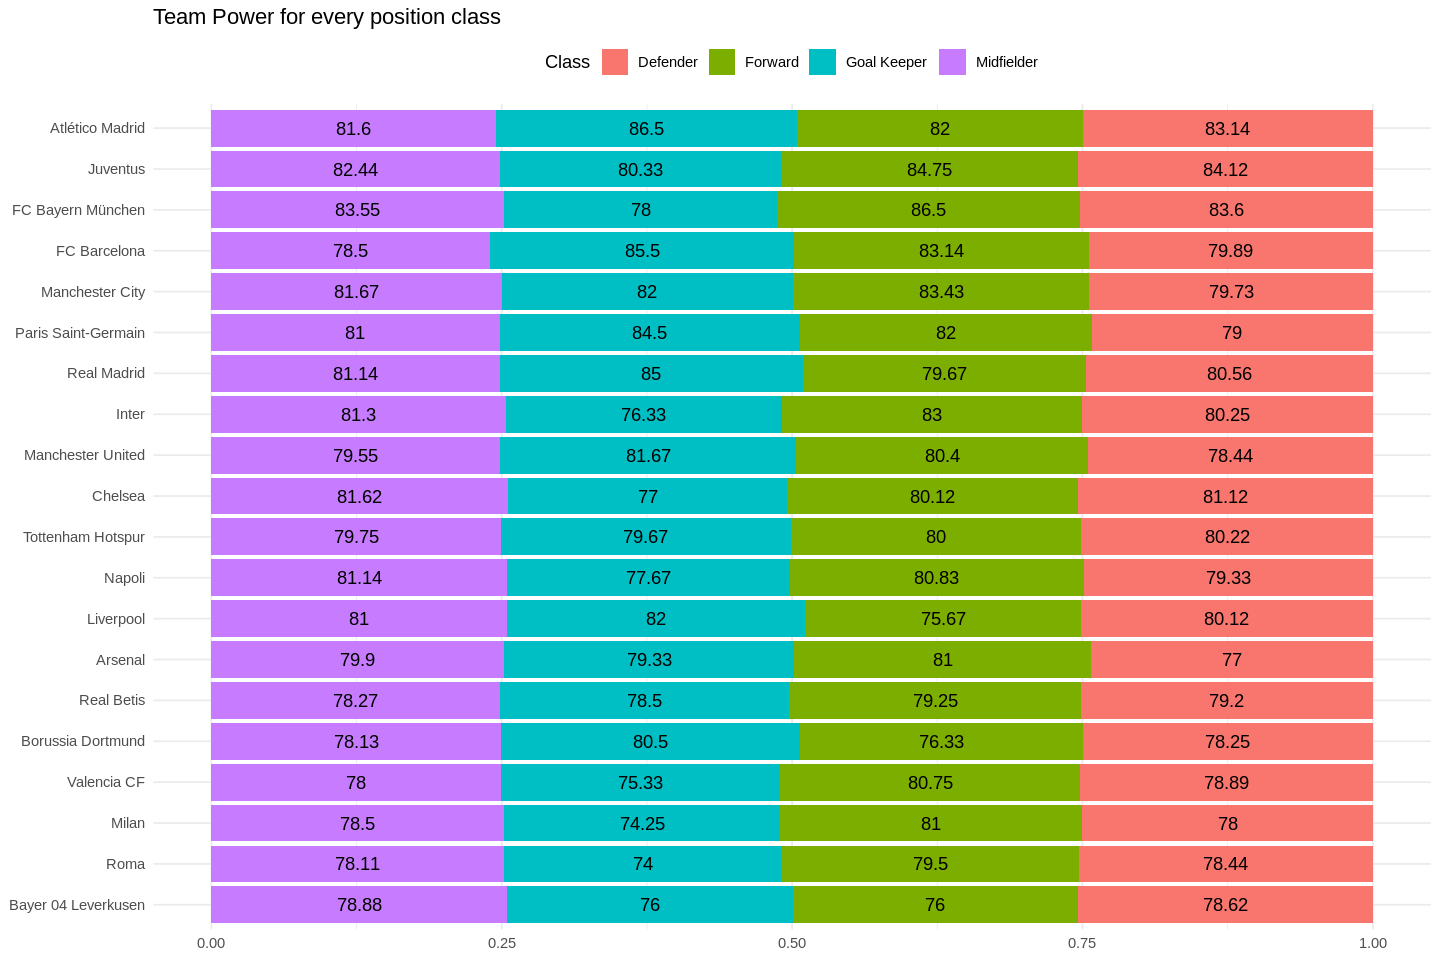

In [51]:
options(repr.plot.width = 12, repr.plot.height = 8)

powerful <- df %>% 
  group_by(Club) %>% 
  summarise(mean = mean(Overall)) %>% 
  arrange(-mean) %>% 
  head(20)


df %>% 
  group_by(Club, Class) %>% 
  summarise(mean = mean(Overall)) %>% 
  ungroup() %>% 
  filter(Club %in% powerful$Club) %>% 
  ggplot(aes(reorder(Club, mean), mean, fill = Class))+
  geom_col(position = "fill")+
  geom_text(aes(label = round(mean,digits = 2)), position = position_fill(0.5))+
  coord_flip()+
  theme_minimal()+
  theme(legend.position = "top")+
  labs(x = NULL, y = NULL, title = "Team Power for every position class")

<a id="subsection30"></a>
## 5.10.Top 10 Wonderkid

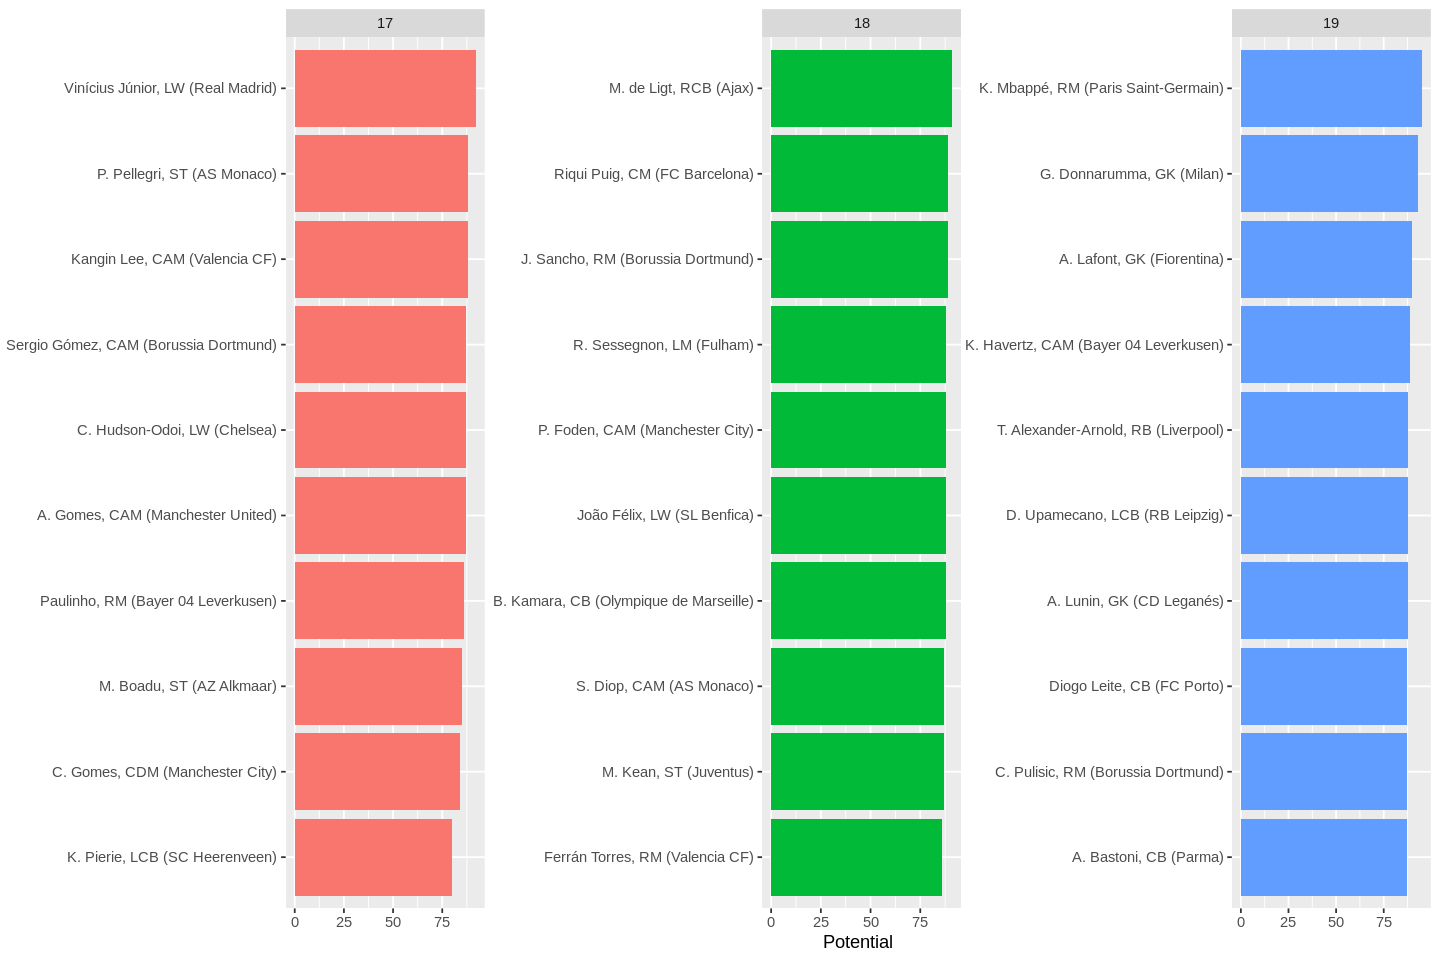

In [55]:
df %>% 
    filter(Age < 20, Potential > 69) %>% 
    arrange(-Potential)%>% 
    group_by(Age)%>%
    do(head(.,10))%>%
    ggplot(aes(reorder(paste0(paste(Name, Position, sep =", "), " (",Club, ")"), Potential), Potential, fill = as.factor(Age)))+
    geom_col(show.legend = FALSE)+
    coord_flip()+
    facet_wrap(Age~., scales = "free")+
    labs(x = NULL)